In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
data = pd.read_csv('Flight_Booking.csv')
data.drop('Unnamed: 0',axis=1,inplace=True)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [4]:
data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [5]:
data.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

C:\Users\DARSHIT\AppData\Local\Temp\ipykernel_11320\3916738982.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot = True)


<Axes: >

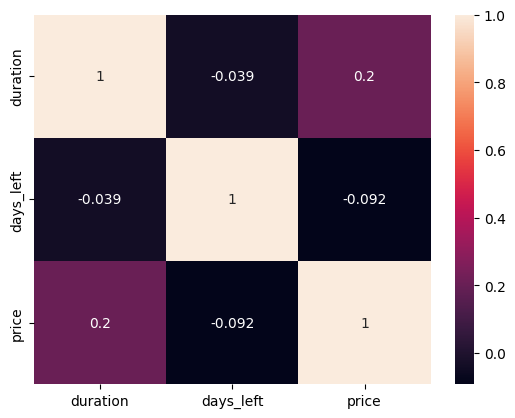

In [6]:
sns.heatmap(data.corr(),annot = True)

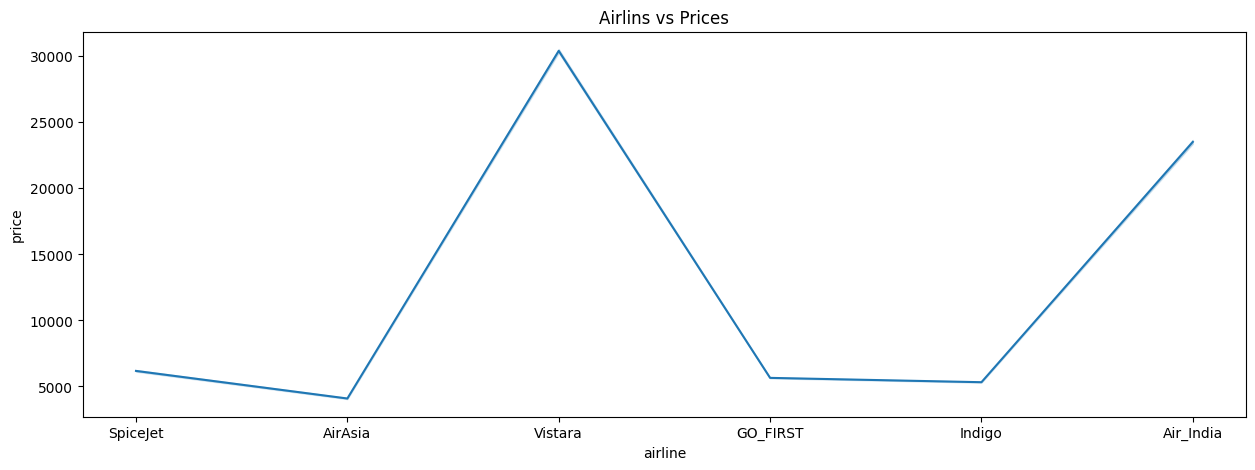

In [7]:
plt.figure(figsize=(15,5))
sns.lineplot(x=data['airline'],y=data['price'])
plt.title('Airlins vs Prices')
plt.show()

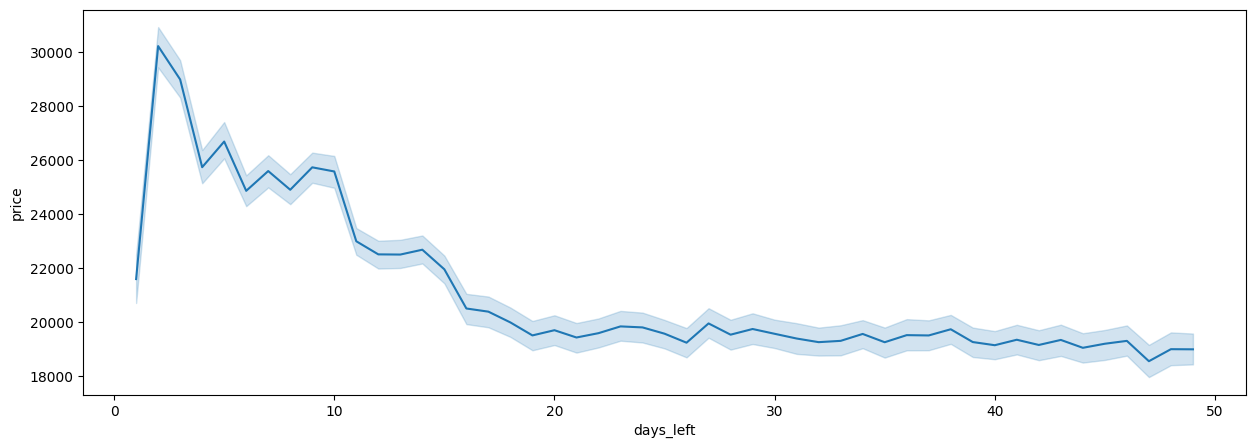

In [8]:
plt.figure(figsize=(15,5))
sns.lineplot(x=data['days_left'],y=data['price'])
plt.show()

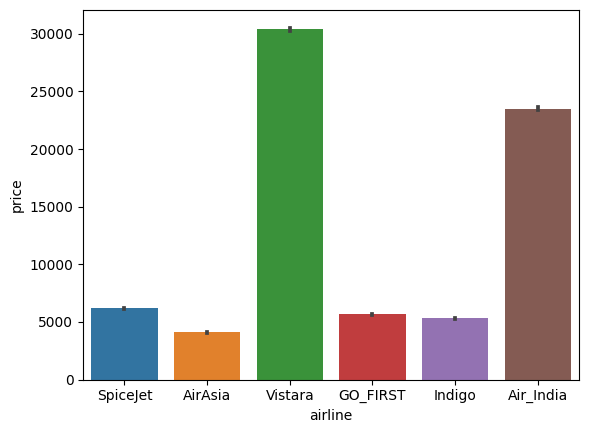

In [9]:
sns.barplot(x = data.airline,y=data.price)
plt.show()

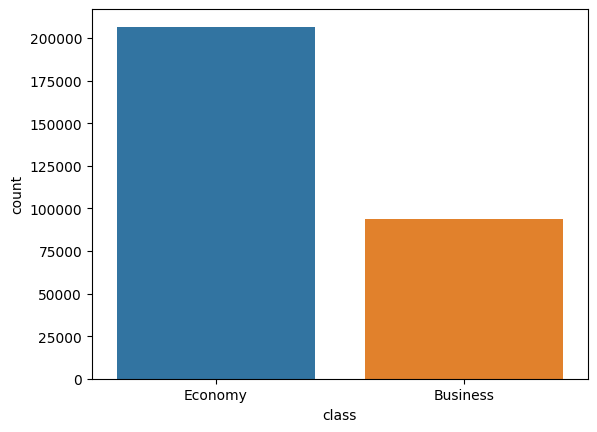

In [10]:
sns.countplot(x = data['class'])
plt.show()

In [11]:
data['class'].unique()

array(['Economy', 'Business'], dtype=object)

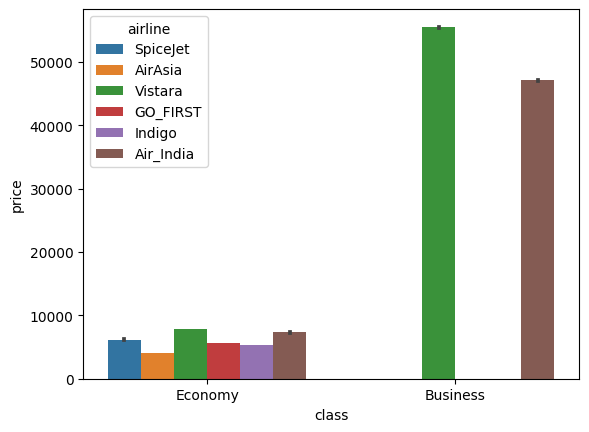

In [12]:
sns.barplot(x = data['class'],y=data.price,hue=data.airline)
plt.show()

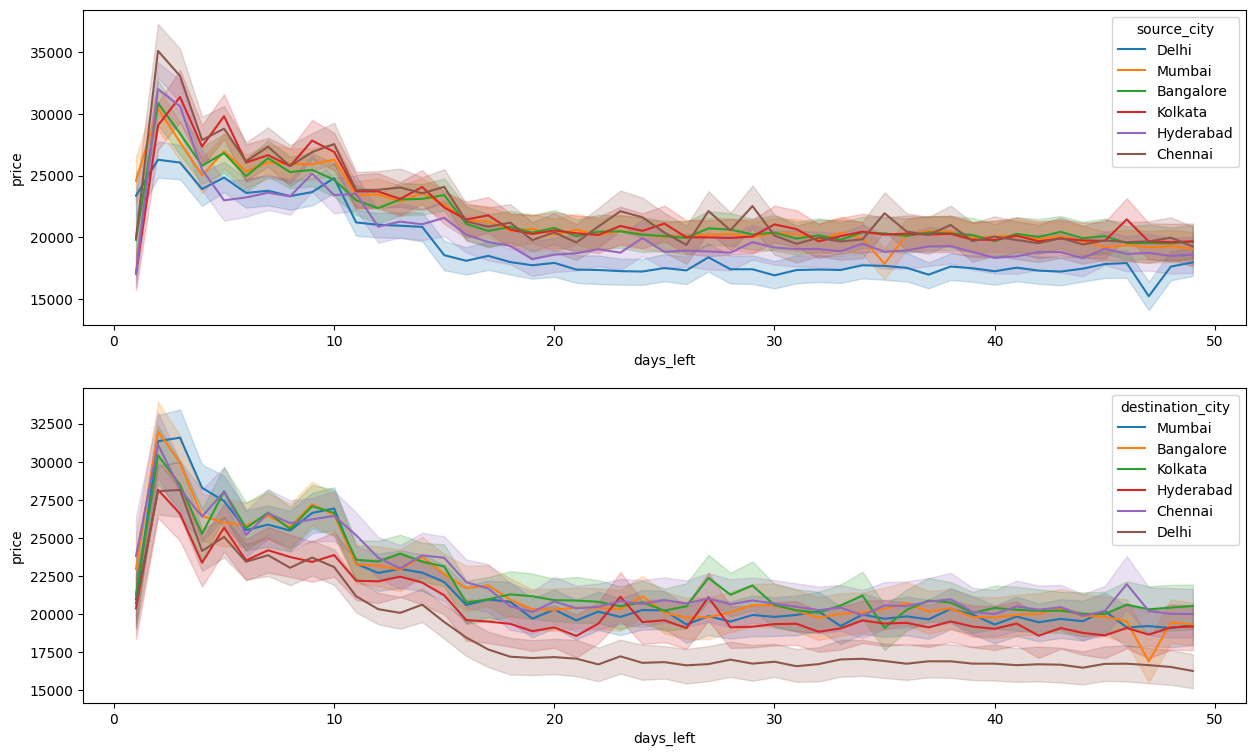

In [13]:
fig,ax = plt.subplots(2,1,figsize=(15,9))

sns.lineplot(x = data.days_left,y=data.price,ax=ax[0],hue = data.source_city)
sns.lineplot(x = data.days_left,y=data.price,ax=ax[1],hue = data.destination_city)
plt.show()

In [14]:
# for i,column_name in enumerate(data.columns):
#     plt.figure(figsize=(15,23))
#     plt.subplot(6,2,i+1)
#     sns.countplot(x = data[column_name])
#     plt.show()  

In [15]:
le = LabelEncoder()

In [16]:
data['airline'] = le.fit_transform(data['airline'])
data['source_city'] = le.fit_transform(data['source_city'])
data['departure_time'] = le.fit_transform(data['departure_time'])
data['stops'] = le.fit_transform(data['stops'])
data['arrival_time'] = le.fit_transform(data['arrival_time'])
data['destination_city'] = le.fit_transform(data['destination_city'])
data['class'] = le.fit_transform(data['class'])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int32  
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  int32  
 3   departure_time    300153 non-null  int32  
 4   stops             300153 non-null  int32  
 5   arrival_time      300153 non-null  int32  
 6   destination_city  300153 non-null  int32  
 7   class             300153 non-null  int32  
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int32(7), int64(2), object(1)
memory usage: 17.2+ MB


C:\Users\DARSHIT\AppData\Local\Temp\ipykernel_11320\478861988.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot = True)


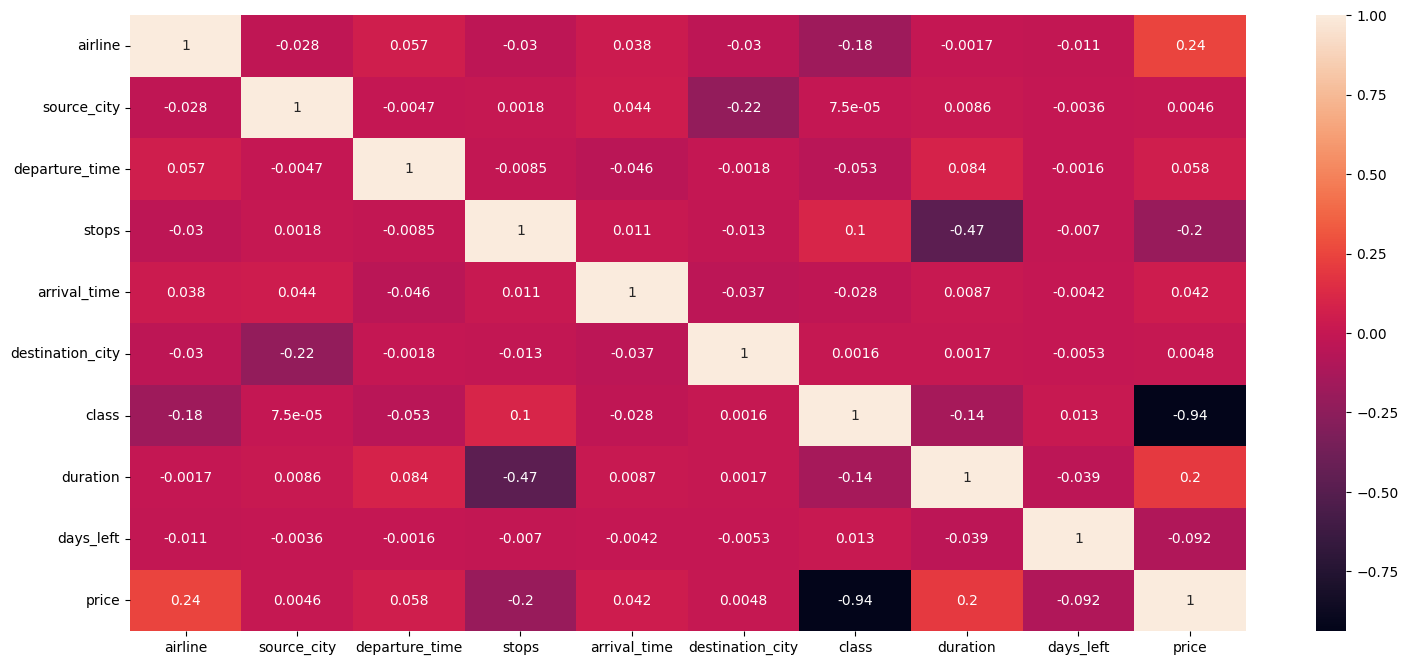

In [17]:
plt.figure(figsize=(18,8))
sns.heatmap(data.corr(),annot = True)
plt.show()

In [18]:
col_list = []

for col in data.columns:
    if((data[col].dtype != 'object') & (col != 'price')):
        col_list.append(col)
col_list        

['airline',
 'source_city',
 'departure_time',
 'stops',
 'arrival_time',
 'destination_city',
 'class',
 'duration',
 'days_left']

# If the score of vif is > 5 then drop that column 
# here we don't have score > 5 of any column so we don't frop any column  

In [28]:
x = data[col_list]
#print(x)
vif_data = pd.DataFrame()
vif_data['feture'] = x.columns
vif_data
vif_data['vif_score'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

,feture,vif_score
0,airline,3.393124
1,source_city,2.927766
2,departure_time,2.779427
3,stops,1.426614
4,arrival_time,3.684550
5,destination_city,2.885337
6,class,2.849370
7,duration,4.113876
8,days_left,3.976790


In [29]:
data

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,SG-8709,2,2,2,5,5,1,2.17,1,5953
1,4,SG-8157,2,1,2,4,5,1,2.33,1,5953
2,0,I5-764,2,1,2,1,5,1,2.17,1,5956
3,5,UK-995,2,4,2,0,5,1,2.25,1,5955
4,5,UK-963,2,4,2,4,5,1,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,5,UK-822,1,4,0,2,3,0,10.08,49,69265
300149,5,UK-826,1,0,0,5,3,0,10.42,49,77105
300150,5,UK-832,1,1,0,5,3,0,13.83,49,79099
300151,5,UK-828,1,1,0,2,3,0,10.00,49,81585


In [44]:
x = data.drop(['price','flight'],axis = 1)
y = data['price']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

s = StandardScaler()

x_train = s.fit_transform(x_train)
x_test = s.transform(x_test)

In [45]:
model1 = LinearRegression()

In [46]:
model1.fit(x_train,y_train)

LinearRegression()

In [49]:
pred1 = model1.predict(x_test)
pred1

array([ 4585.88050973, 52842.07707275,  7877.98018389, ...,
        5848.96550017, -1498.06191817, 58762.40634474])

In [52]:
final_ans = pd.DataFrame()

final_ans['Actual_Price'] = y_test
final_ans['Predicted_Price'] = pred1

final_ans

,Actual_Price,Predicted_Price
27131,7366,4585.880510
266857,64831,52842.077073
141228,6195,7877.980184
288329,60160,56120.138579
97334,6578,6663.204177
...,...,...
5234,5026,5829.230618
5591,3001,539.222230
168314,6734,5848.965500
175191,5082,-1498.061918


In [54]:
r2_s = r2_score(y_test,pred1)
r2_s

0.904554350718816

In [58]:
mae = mean_absolute_error(y_test,pred1)
mae

4624.994868017024

In [60]:
maep = mean_absolute_percentage_error(y_test,pred1)
maep

0.4353581089683548

In [62]:
mse = mean_squared_error(y_test,pred1)
mse

49200540.29372198

In [63]:
root_mean_squred_error = np.sqrt(mean_squared_error(y_test,pred1))
root_mean_squred_error

7014.309680483318

C:\Users\DARSHIT\AppData\Local\Temp\ipykernel_11320\817814893.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test,label = 'Actual')
C:\Users\DARSHIT\AppData\Local\Temp\ipykernel_11320\817814893.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pred1,label = 'Predicted')


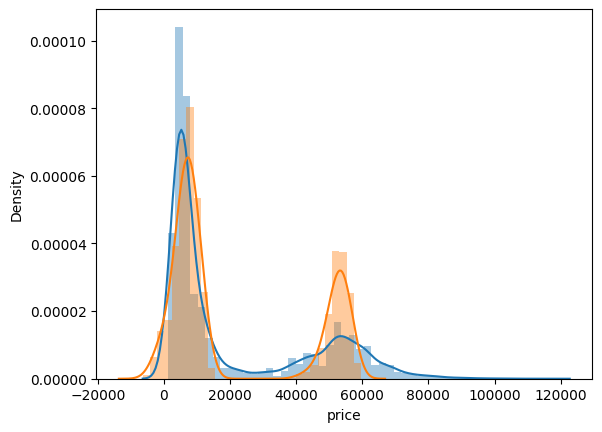

In [65]:
sns.distplot(y_test,label = 'Actual')
sns.distplot(pred1,label = 'Predicted')
plt.show()
plt.legend()

In [67]:
model2 = DecisionTreeRegressor()

In [68]:
model2.fit(x_train,y_train)
pred2 = model2.predict(x_test)
pred2

array([ 7366., 72783.,  6195., ...,  6314.,  5082., 70049.])

In [70]:
final_ans2 = pd.DataFrame()

final_ans2['Actual_Price'] = y_test
final_ans2['Predicted_Price'] = pred2

final_ans2

,Actual_Price,Predicted_Price
27131,7366,7366.0
266857,64831,72783.0
141228,6195,6195.0
288329,60160,60160.0
97334,6578,6578.0
...,...,...
5234,5026,5301.0
5591,3001,3001.0
168314,6734,6314.0
175191,5082,5082.0


In [71]:
r2_s2 = r2_score(y_test,pred2)
r2_s2

0.9755999184127164

In [72]:
mae2 = mean_absolute_error(y_test,pred2)
mae2

1173.4214433653724

In [73]:
maep2 = mean_absolute_percentage_error(y_test,pred2)
maep2

0.07374428275130496

In [74]:
mse2 = mean_squared_error(y_test,pred2)
mse2

12577809.531878898

In [75]:
root_mean_squred_error2 = np.sqrt(mean_squared_error(y_test,pred2))
root_mean_squred_error2

3546.520764337761

C:\Users\DARSHIT\AppData\Local\Temp\ipykernel_11320\516444474.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test,label = 'Actual')
C:\Users\DARSHIT\AppData\Local\Temp\ipykernel_11320\516444474.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pred2,label = 'Predicted')


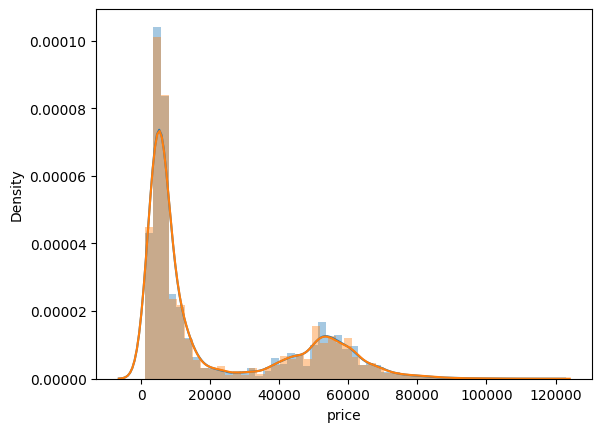

In [76]:
sns.distplot(y_test,label = 'Actual')
sns.distplot(pred2,label = 'Predicted')
plt.show()

In [82]:
model3 = RandomForestRegressor()

In [84]:
model3.fit(x_train,y_train)


RandomForestRegressor()

In [85]:
pred3 = model3.predict(x_test)
pred3

array([ 6447.9725, 70489.02  ,  6195.    , ...,  6535.69  ,  4246.73  ,
       68892.24  ])

In [86]:
final_ans3 = pd.DataFrame()

final_ans3['Actual_Price'] = y_test
final_ans3['Predicted_Price'] = pred3

final_ans3

,Actual_Price,Predicted_Price
27131,7366,6447.9725
266857,64831,70489.0200
141228,6195,6195.0000
288329,60160,60541.7600
97334,6578,6550.7600
...,...,...
5234,5026,5172.3900
5591,3001,2995.2800
168314,6734,6535.6900
175191,5082,4246.7300


C:\Users\DARSHIT\AppData\Local\Temp\ipykernel_11320\2473885486.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test,label = 'Actual')
C:\Users\DARSHIT\AppData\Local\Temp\ipykernel_11320\2473885486.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pred3,label = 'Predicted')


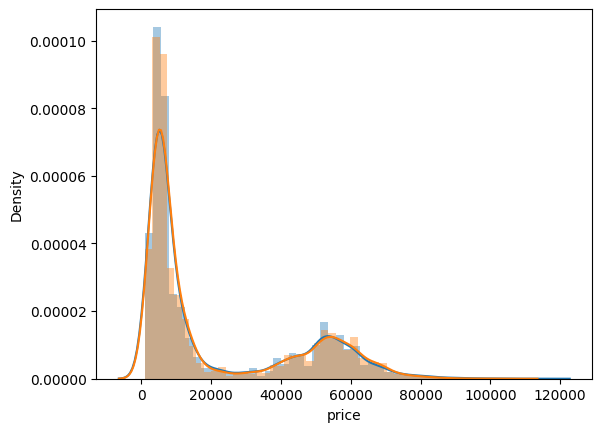

In [87]:
sns.distplot(y_test,label = 'Actual')
sns.distplot(pred3,label = 'Predicted')
plt.show()